In [1]:
import pandas as pd
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

In [2]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [3]:
df.columns

Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')

In [4]:
df.shape


(2000, 5)

In [5]:
df.tail()

,productTitle,originalPrice,price,sold,tagText
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping
1999,Bed Frane Bamboo and Metal Platform Bed Frame ...,NaN,$99.48,0,Free shipping


In [6]:
df.describe()

,sold
count,2000.000000
mean,23.493500
std,254.094061
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [8]:
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [9]:
# price cleanup
df['price'] = df['price'].astype(str).str.replace(r'[\$,]', '', regex=True).str.replace(' ', '').astype(float)

# originalPrice often missing in this dataset; either fill from price or drop
# Option A: keep but fill NaN = price (if originalPrice missing assume no discount)
df['originalPrice'] = df['originalPrice'].astype(str).str.replace(r'[\$,]', '', regex=True).str.replace(' ', '')
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')
df['originalPrice'] = df['originalPrice'].fillna(df['price'])

# sold: ensure numeric
df['sold'] = pd.to_numeric(df['sold'], errors='coerce').fillna(0).astype(int)

# tagText: unify (for example collapse rare shipping tags to "others")
df['tagText'] = df['tagText'].fillna('unknown')
common = df['tagText'].value_counts().nlargest(5).index.tolist()
df['tagText'] = df['tagText'].apply(lambda x: x if x in common else 'others')


In [10]:
df.tail()

,productTitle,originalPrice,price,sold,tagText
1995,Modern TV Stand Entertainment Center with Two ...,72.49,72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",276.65,276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",196.44,196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,228.18,228.18,0,Free shipping
1999,Bed Frane Bamboo and Metal Platform Bed Frame ...,99.48,99.48,0,Free shipping


sold_range
0-100        1952
100-200        22
200-300         7
300-400         5
400-500         1
500-600         3
600-700         1
700-800         0
800-900         3
900-1000        2
1000-1100       0
1100-1200       0
1200-1300       0
1300-1400       0
1400-1500       0
1500-1600       0
1600-1700       0
1700-1800       0
1800-1900       0
1900-2000       1
Name: count, dtype: int64


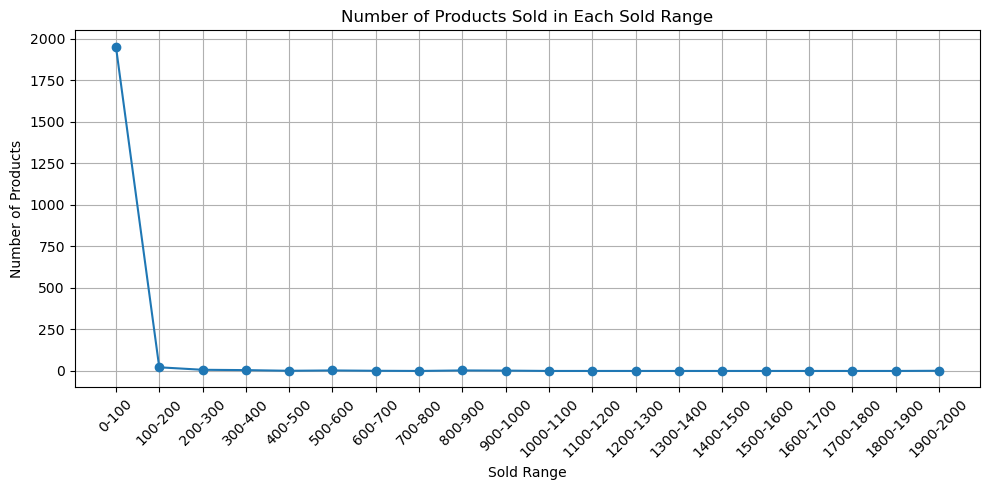

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define sold ranges (bins)
# bins = range(0, 2001, 100)   # 0–100, 100–200, ..., 1900–2000
# labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut sold values into these ranges
df['sold_range'] = pd.cut(df['sold'], bins=bins, labels=labels, include_lowest=True)

# Count products in each range
range_counts = df['sold_range'].value_counts().sort_index()
print(range_counts)
# Line graph
plt.figure(figsize=(10,5))
plt.plot(range_counts.index, range_counts.values, marker='o')
plt.title("Number of Products Sold in Each Sold Range")
plt.xlabel("Sold Range")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



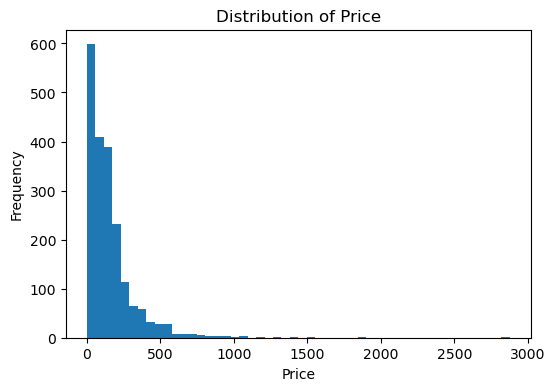

In [26]:
plt.figure(figsize=(6,4))
plt.hist(df['price'], bins=50)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


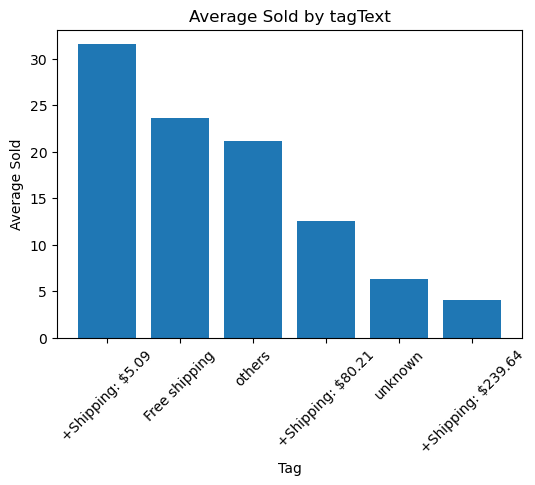

In [29]:
avg_tag = df.groupby('tagText')['sold'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(avg_tag.index, avg_tag.values)
plt.title("Average Sold by tagText")
plt.xlabel("Tag")
plt.ylabel("Average Sold")
plt.xticks(rotation=45)
plt.show()

/var/folders/7s/ps8hrwbn0hn05mhqg21fcznc0000gn/T/ipykernel_1665/2107740330.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sold_bin = df.groupby('price_bin')['sold'].mean()


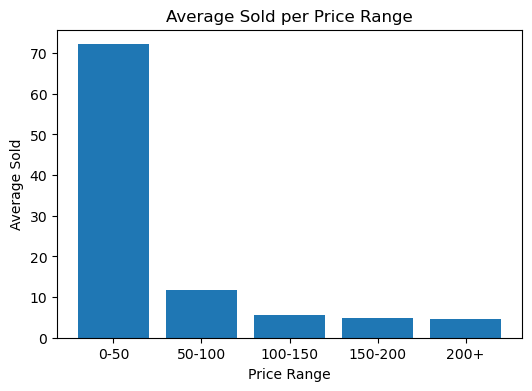

In [30]:
bins = [0, 50, 100, 150, 200, 3000]
labels = ["0-50", "50-100", "100-150", "150-200", "200+"]

df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
avg_sold_bin = df.groupby('price_bin')['sold'].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_sold_bin.index.astype(str), avg_sold_bin.values)
plt.title("Average Sold per Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Sold")
plt.show()

/var/folders/7s/ps8hrwbn0hn05mhqg21fcznc0000gn/T/ipykernel_1665/946419640.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sold = df.groupby('price_bin')['sold'].mean()


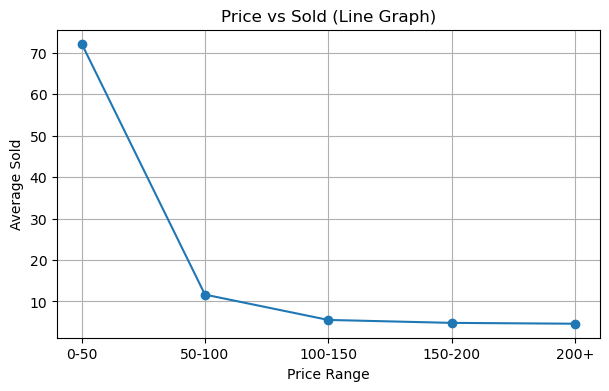

In [33]:
import matplotlib.pyplot as plt

# Create price bins
bins = [0, 50, 100, 150, 200, 3000]
labels = ["0-50", "50-100", "100-150", "150-200", "200+"]

df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Average sold per price range
avg_sold = df.groupby('price_bin')['sold'].mean()

# Line graph
plt.figure(figsize=(7,4))
plt.plot(avg_sold.index.astype(str), avg_sold.values, marker='o')
plt.title("Price vs Sold ")
plt.xlabel("Price Range")
plt.ylabel("Average Sold")
plt.grid(True)
plt.show()


In [35]:
#FEATURE ENGINEERING
#Discount Percentage
df['discount_pct'] = ((df['originalPrice'] - df['price']) / df['originalPrice']).clip(lower=0)
print(df['discount_pct'])

0       0.000000
1       0.000000
2       0.496684
3       0.000000
4       0.562270
          ...   
1995    0.000000
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: discount_pct, Length: 2000, dtype: float64


In [36]:
#Title length
df['title_len'] = df['productTitle'].astype(str).str.len()
print(df['title_len'])

0       127
1       127
2       124
3       128
4       121
       ... 
1995    122
1996    127
1997    128
1998    124
1999    125
Name: title_len, Length: 2000, dtype: int64


In [37]:
#Title word count
df['title_words'] = df['productTitle'].astype(str).str.split().apply(len)
print(df['title_words'])

0       19
1       18
2       19
3       17
4       17
        ..
1995    18
1996    17
1997    20
1998    18
1999    23
Name: title_words, Length: 2000, dtype: int64


In [39]:
#Encode tagtext
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['tag_enc'] = le.fit_transform(df['tagText'])
print(df['tag_enc'])

0       3
1       3
2       3
3       3
4       3
       ..
1995    3
1996    3
1997    3
1998    3
1999    3
Name: tag_enc, Length: 2000, dtype: int64


In [40]:
#Train-test split
from sklearn.model_selection import train_test_split

# Select features
features = ['price', 'originalPrice', 'discount_pct', 'title_len', 'title_words', 'tag_enc']
X = df[features]
y = df['sold']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
RMSE: 74.06645915339813
R² Score: -0.000423340656351634


In [46]:
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression:
RMSE: 73.93025935190657
R² Score: 0.0032526060803556023


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest:
RMSE: 226.73004299043944
R² Score: -8.374730465749238


In [50]:
X.isnull().sum()


price            0
originalPrice    0
discount_pct     0
title_len        0
title_words      0
tag_enc          0
dtype: int64

In [54]:
# Log transform the target
import numpy as np
y_log = np.log1p(df['sold'])
print(y_log)

0       6.398595
1       0.000000
2       2.079442
3       0.000000
4       0.693147
          ...   
1995    2.197225
1996    1.098612
1997    2.397895
1998    0.000000
1999    0.000000
Name: sold, Length: 2000, dtype: float64


In [56]:
#train test. split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)
#train random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
#predict
y_pred_log = rf.predict(X_test)
#convert back to original scale
y_pred = np.expm1(y_pred_log)
y_actual = df['sold'].iloc[X_test.index]
#Evaluate
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE:", np.sqrt(mean_squared_error(y_actual, y_pred)))
print("R² Score:", r2_score(y_actual, y_pred))


RMSE: 69.96015490448494
R² Score: 0.10743022927908652


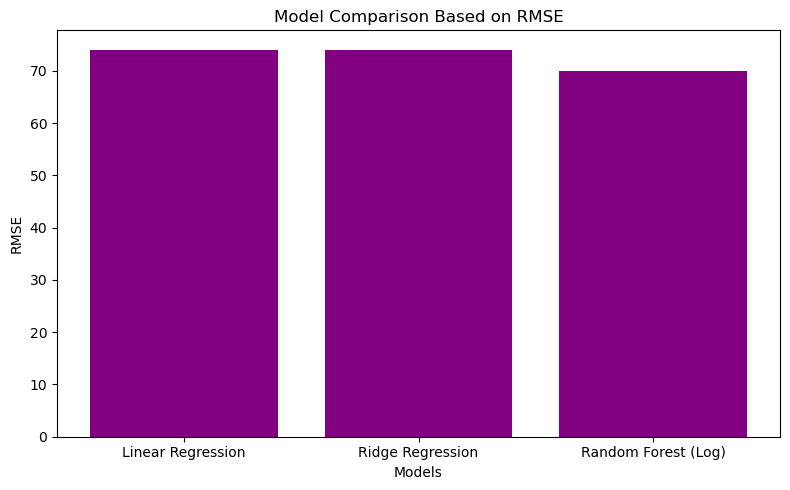

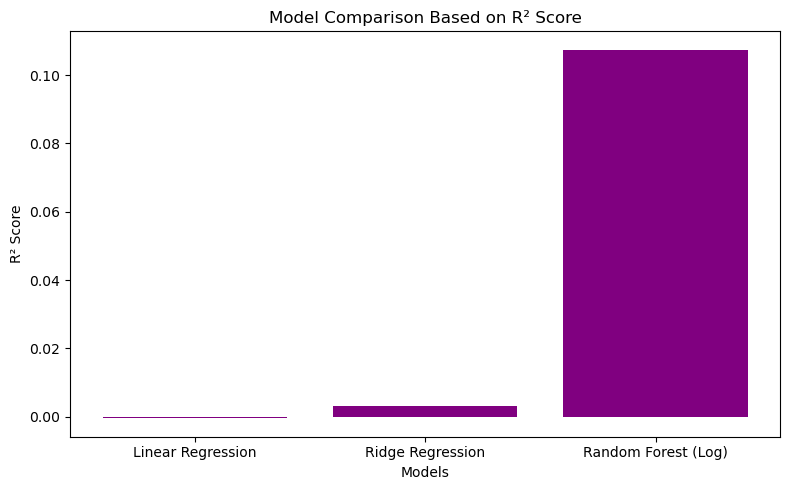

In [63]:
#comparison
import matplotlib.pyplot as plt

# Model performance values
models = ["Linear Regression", "Ridge Regression", "Random Forest (Log)"]
rmse_values = [74.066, 73.93, 69.96]
r2_values = [-0.00042, 0.00325, 0.1074]

# =================== RMSE BAR CHART ===================
plt.figure(figsize=(8,5))
plt.bar(models, rmse_values,color='purple')
plt.title("Model Comparison Based on RMSE")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

# =================== R² SCORE BAR CHART ===================
plt.figure(figsize=(8,5))
plt.bar(models, r2_values,color='purple')
plt.title("Model Comparison Based on R² Score")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()
